In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Applied Machine Learning

/content/drive/MyDrive/01


![](https://miro.medium.com/max/600/1*cW3LICjeBTX2-GqAAuhuGw.png)

> # **Applied Machine Learning** *Cascading Meta-learne*

---

**Table of contents**

*   Importing Libaries
*   Data pre-processing
*   Decision Tree Base Learner
  *   1
  *   2
*   [StackBoost-Cascading](#sc)
  *   3
  *   4




![](https://github.com/saugatapaul1010/Ensemble-Learning-BLOG/raw/0e0fc45d3d98dbe6a60c73723f814c0511171ef7/CascadingTESTING.jpg)

**Background**


Cascading, according to Google, in simple English literature means "a process whereby something, typically information or knowledge, is successively passed on". Cascading is one of the most powerful ensemble learning algorithm which is used by Machine Learning engineers and scientists when they want to be absolutely dead sure about the accuracy of a result. For example, suppose we want to build a machine learning model which would detect if a credit card transaction is fraudulent or not. If you think about it, it's a binary classification problem where a class label 0 means the transaction is not fraud & a class label 1 means the transaction is fraudulent. In such a model, it's very risky to put our faith completely on just one model. So what we do is build a sequence of models (or a cascade of models) to be absolutely sure about the fact that the transaction is not fraudulent. Cascade models are mostly used when the cost of making a mistake is very very high. I will try to explain cascading with the help of a simple diagram.



**Dataset**

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## **Importing Libaries**

In [ ]:
import pandas as pd
import numpy as np

# data visualization
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline

# defines the layout to the plotting
sns.set_context('paper', font_scale=1.5)
sns.set_style('whitegrid')

# scoring
from sklearn.metrics import confusion_matrix,recall_score, classification_report, auc, roc_curve,roc_auc_score, fbeta_score

# model processing
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

from sklearn import datasets

In [ ]:
iris_dataset_url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

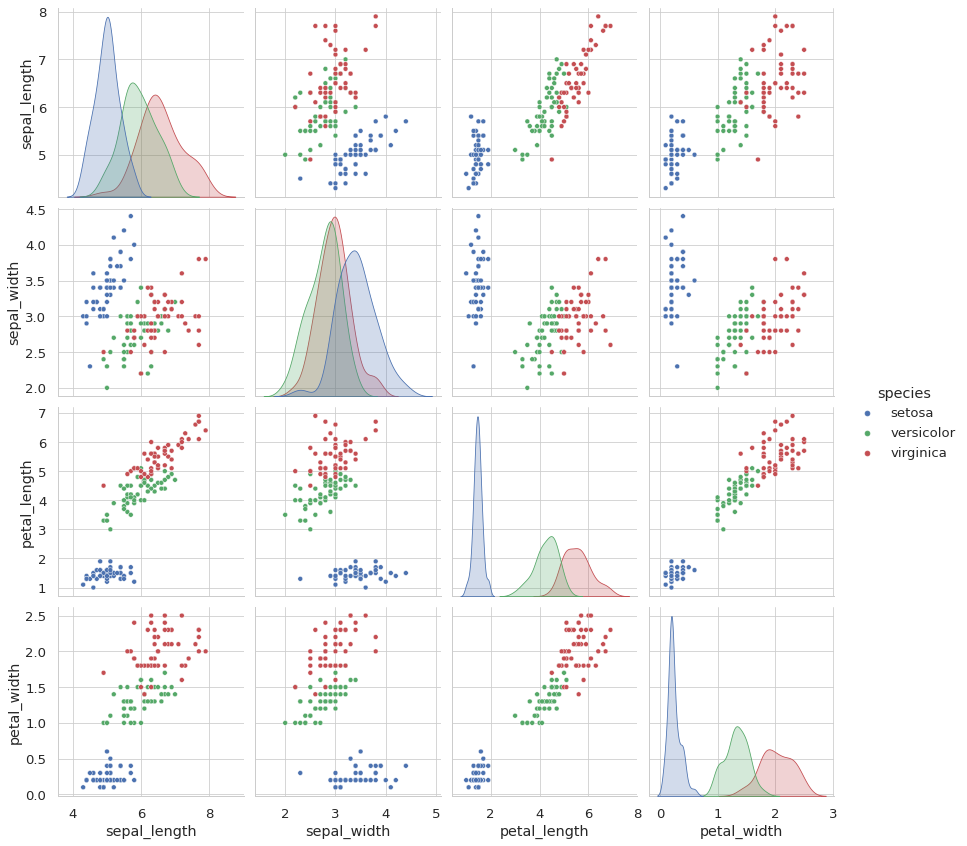

In [ ]:
#Load Iris.csv into a pandas dataFrame.
iris_dataset = pd.read_csv(iris_dataset_url)
X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

#Pair plots for iris dataset
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris_dataset, hue="species", size=3);
plt.show()

## **Decision Tree Base Learner**

![](https://thumbs.dreamstime.com/b/decision-tree-icon-decision-tree-icon-data-analysis-algorithm-concept-131553968.jpg)

### 1
Use a simple `DecisionTreeClassifier` as your base classifier. Make each successive model more complex by increasing the `maximum_depth` of the tree starting from a depth of a single split.

In [ ]:
y = LabelEncoder().fit_transform(y)

### 2
Use a confidence threshold of 0.95 and cascading depth of 15.

In [ ]:
#CONSTANTS 
RANDOM_SEED = 42
CONFIDENCE_THRESHOLD = 0.95
MAXIMUM_DEPTH = 15 

In [ ]:
def cascade_classifer(classifier_array):
  acc_list, var_list  = [], []
  labels = [clf.__class__.__name__ +' '+str(i+1) for i, clf in enumerate(classifier_array)]
  for clf, label in zip(classifier_array, labels):
      cv_scores = cross_val_score(clf, X, y, cv=2, scoring='accuracy')
      print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
      acc_list.append(np.round(cv_scores.mean(), 4))
      var_list.append(np.round(cv_scores.std(), 4))
      if CONFIDENCE_THRESHOLD <= cv_scores.mean(): return clf, cv_scores.mean(), cv_scores.std()
  return classifier_array[-1], acc_list[-1], var_list[-1]

In [ ]:
#base learners
classifier_array = [DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=RANDOM_SEED) for depth in range(1, MAXIMUM_DEPTH+1)]

In [ ]:
best_clf, acc, var = cascade_classifer(classifier_array)

Accuracy: 0.6600 (+/- 0.0000) [DecisionTreeClassifier 1]
Accuracy: 0.9333 (+/- 0.0189) [DecisionTreeClassifier 2]
Accuracy: 0.9733 (+/- 0.0249) [DecisionTreeClassifier 3]


<div id="sc"></div>

##StackBoost Cascading 

### 3 
What changes would you make to the algorithm/implementation to improve performance?

> **Our Approuch - StackBoost Cascading**

**1.**   Change from **Tree** base classifiers to **Boosting**
classifiers (e.g. `XGBoost`, `AdaBoost` and `GradientBoosting`)

**2.**   Tune more hyperparameters when cascading (e.g. `max_depth`, `n_estimators` and `learning_rate`)

**3.**   Evaluate using `Cross-Validation` Procedure 

**4.**   Use Ensemble Voting - Majority Role (e.g. `hard` or `soft` voting)


**Boosting**

The second ensemble technique that we are going to discuss today is called Boosting. Boosting, in general, is used to convert weak learners to strong ones. Weak learners are basically classifier which has a very weak correlation with the true class labels and strong learners are classifiers that have a very high correlation between the model and the true class labels. Boosting involves training the weak learners iteratively, each trying to correct the error made by the previous model. This is achieved by training a weak model on the whole training data, then building a second model which aims at correcting the errors made by the first model. Then we build a third model which will correct the errors made by the second model and so on.


In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier

The **`EnsembleVoteClassifier`** is a meta-classifier for combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting. (For simplicity, we will refer to both majority and plurality voting as majority voting.)

![](http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier_files/majority_voting.png)

The `EnsembleVoteClassifier` implements "`hard`" and "`soft`" voting. In hard voting, we predict the final class label as the class label that has been predicted most frequently by the classification models. In soft voting, we predict the class labels by averaging the class-probabilities (only recommended if the classifiers are well-calibrated).

In [ ]:
ensemble_array = []

for depth, estimators in zip(range(1, MAXIMUM_DEPTH+1), range(5,76,5)):
  ada_boost = AdaBoostClassifier(learning_rate=0.015/depth, n_estimators=estimators)
  grad_boost = GradientBoostingClassifier(max_depth=depth, n_estimators=estimators)
  xgb_boost = XGBClassifier(max_depth=depth, learning_rate=0.015/depth)
  ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
  ensemble_array.append(ensemble_clf)

In [ ]:
def boosting_cascade_classifer(ensemble_array):
  acc_list, var_list  = [], []
  labels = [clf.__class__.__name__ +' '+str(i+1) for i, clf in enumerate(ensemble_array)]
  for clf, label in zip(ensemble_array, labels):
      cv_scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
      print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
      acc_list.append(np.round(cv_scores.mean(), 4))
      var_list.append(np.round(cv_scores.std(), 4))
      if CONFIDENCE_THRESHOLD <= cv_scores.mean(): return clf, cv_scores.mean(), cv_scores.std()
  return ensemble_array[-1], acc_list[-1], var_list[-1]

###4

Evaluate the predictive performance using the `log-loss` metric.

In [ ]:
best_clf, acc, var = boosting_cascade_classifer(ensemble_array)

Accuracy: 0.9400 (+/- 0.0163) [EnsembleVoteClassifier 1]
Accuracy: 0.9400 (+/- 0.0163) [EnsembleVoteClassifier 2]
Accuracy: 0.9667 (+/- 0.0189) [EnsembleVoteClassifier 3]
